# Statistics for Data Science with Python

<p> This project uses the housing agency in Boston MA, a dataset on housing prices derived from the U.S. Census Service to present insights to higher management. 
A csv file is provided : 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'. 
Here are the dataset variables:
    <li>CRIM - per capita crime rate by town</li> 
    <li>ZN - proportion of residential land zoned for lots over 25,000 sq.ft.</li>
    <li>INDUS - proportion of non-retail business acres per town.</li>
    <li>CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)</li>
    <li>NOX - nitric oxides concentration (parts per 10 million)</li>
    <li>RM - average number of rooms per dwelling</li>
    <li>AGE - proportion of owner-occupied units built prior to 1940</li>
    <li>DIS - weighted distances to five Boston employment centres</li>
    <li>RAD - index of accessibility to radial highways </li>
    <li>TAX - full-value property tax rate per 10000 dollars </li>
    <li>PTRATIO - pupil-teacher ratio by town</li>
    <li>LSTAT - percent lower status of the population </li>
    <li>MEDV - Median value of owner-occupied homes in 1000's dollars </li>


<p>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns
import scipy.stats
import statsmodels.api as sm

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

## Task 1
###  Getting to know the dataset 

In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [7]:
boston_df.describe

<bound method NDFrame.describe of      Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

     

## Task 2: Visualization
### Creating a boxplot for the Median value of owner-occupied homes

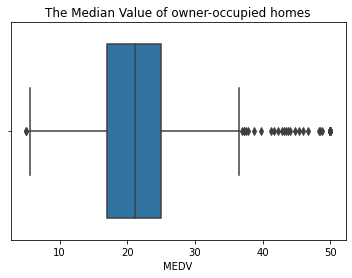

The median value of owner-occupied homes is 21.2


In [16]:
ax=sns.boxplot(x='MEDV',data=boston_df).set(title="The Median Value of owner-occupied homes")
pyplot.show()
print(f"The median value of owner-occupied homes is {boston_df['MEDV'].median()}")

<p> The boxplot above provides a summary of the median values of owner-occupied homes in the Boston Area. The median value was 21.2 with a an interquartile range (IQR) between 17 and 25 where 50% of the values are found. A min value was shown to be around 13 while a max value is shown to be around 36. There were numerous outliers above the max value. </p>

### Creating a barplot for the Charles River values

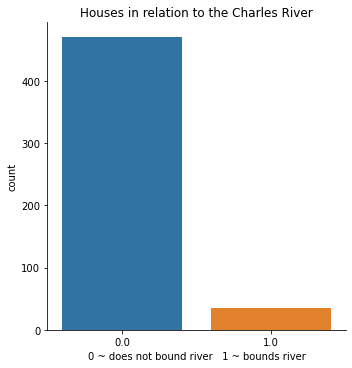

471 houses do not bound the Charles river, while 35 do


In [21]:
ax=sns.catplot(x="CHAS", kind='count', data=boston_df).set(title="Houses in relation to the Charles River")
pyplot.xlabel("0 ~ does not bound river   1 ~ bounds river")
pyplot.show()

bounding = len(boston_df[boston_df['CHAS'] == 1.0])
not_bounding = len(boston_df[boston_df['CHAS'] == 0.0])
print(f"{not_bounding} houses do not bound the Charles river, while {bounding} do")

### Creating a boxplot for the MEDV variable vs. the Age variable
<p> Age is a continuous variable. To create a boxplot I categorized the age variable into 3 groups of 35 years and younger, between 35 and 70, and 70 years and older. </p> 


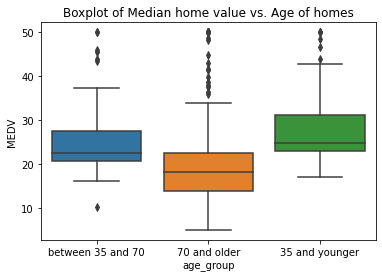

Hosues built more recently tend to have a higher median value than houses that are older.


In [29]:
boston_df.loc[(boston_df['AGE'] <=35), 'age_group']= '35 and younger'
boston_df.loc[(boston_df['AGE'] >35)&(boston_df['AGE'] < 70), 'age_group']= 'between 35 and 70'
boston_df.loc[(boston_df['AGE'] >=70), 'age_group']='70 and older'

ax=sns.boxplot(x='age_group', y="MEDV", data=boston_df)
pyplot.title("Boxplot of Median home value vs. Age of homes")
pyplot.show()
print("Hosues built more recently tend to have a higher median value than houses that are older.")

### Creating a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town


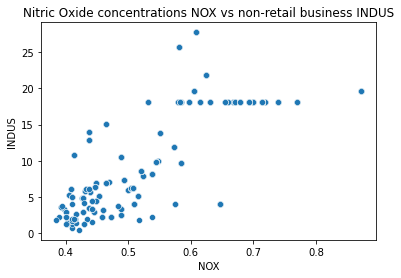

There seems to be a positive correlation between NOX and INDUS


In [31]:
ax=sns.scatterplot(x='NOX', y='INDUS',data=boston_df).set(title="Nitric Oxide concentrations NOX vs non-retail business INDUS")
pyplot.show()
print("There seems to be a positive correlation between NOX and INDUS")

### Creating a histogram for the pupil to teacher ratio variable

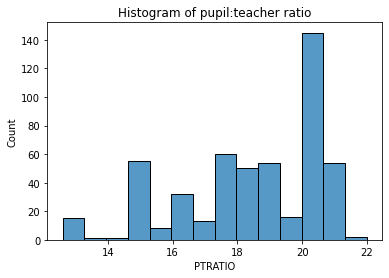

The pupil:teacher ratio of around 20 has the highest count based on the histogram


In [34]:
ax = sns.histplot(boston_df['PTRATIO']).set(title="Histogram of pupil:teacher ratio")
pyplot.show()
print("The pupil:teacher ratio of around 20 has the highest count based on the histogram")

## Task 3: Statistical analysis

### Is there a significant difference in median value of houses bounded by the Charles river or not?
<p> The hypotheses are:
    <li>H0: µ_1=µ_2 there's no difference in MEDV between houses bound by charles river and those that are not</li>
    <li>Ha: µ_1≠µ_2 there is a difference in MEDV between houses bound by charles river and those that are not</li>
To answer this question, I first tested the variances equality using Levene Test, then tested the differences in the mean between the two groups using an independent t-test. </p>

In [36]:
# First, I tested the equality of variances using the Levene test
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

<p> Since p is less than 0.05, we assume the variances are not equal </p> 

In [49]:
boston_df = boston_df.astype({"CHAS": object})
boston_df['CHAS'] = boston_df['CHAS'].replace([1],'Yes')
boston_df['CHAS'] = boston_df['CHAS'].replace([0],'No')
boston_df

s, p_val =scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 'Yes']['MEDV'], 
                   boston_df[boston_df['CHAS'] == 'No']['MEDV'], equal_var = False, nan_policy = "omit")
print(f"There is sufficient evidence to reject the null hypthesis, as the p-value is {p_val}")
print("We can conclude that there is a significant difference in median value of houses bounded by the Charles river and those that are not.")

There is sufficient evidence to reject the null hypthesis, as the p-value is 0.003567170098137517
We can conclude that there is a significant difference in median value of houses bounded by the Charles river and those that are not.


### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?
<p> The age variable can be devided into 3 groups: 35 and younger, 35 to 70, and 70 and older. To compare the 3 groups, I performed an ANOVA test. 
    <li>H0: µ_1=µ_2=µ_3 there is no difference between the 3 age groups</li>
    <li>Ha: at least 1 age group is different </li>
</p>

In [50]:
thirtyfive_lower=boston_df[boston_df['age_group']=='35 and younger']['MEDV']
thirtyfive_seventy=boston_df[boston_df['age_group']=='between 35 and 70']['MEDV']
seventy_older=boston_df[boston_df['age_group']=='70 and older']['MEDV']

f_statistic, p_value=scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy,seventy_older)
print('F_statistic:{0}, P-value:{1}'.format(f_statistic,p_value))
print(f"There is sufficient evidence to reject the null hypthesis, as the p-value is {p_value}")
print("We can conclude that there at least one age group is significantly different than the others")

F_statistic:36.40764999196599, P-value:1.7105011022702984e-15
There is sufficient evidence to reject the null hypthesis, as the p-value is 1.7105011022702984e-15
We can conclude that there at least one age group is significantly different than the others


### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?
<p>To answer this question, I performed a pearson correlation test with the following hypotheses:
    <li>H0: there is no correlation between NOX and INDUS</li>
    <li>Ha: there is a correlation between NOX and INDUS</li>
</p>

In [57]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.763651446920915, 7.913361061239593e-98)

In [58]:
print(f"There is sufficient evidence to reject the null hypthesis, as the p-value is {p_val}")
print("We can conclude that there is a correlation between Nitric oxide concentrations and the proportion of non-retail buisness acres per town")

There is sufficient evidence to reject the null hypthesis, as the p-value is 0.003567170098137517
We can conclude that there is a correlation between Nitric oxide concentrations and the proportion of non-retail buisness acres per town


### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?
<p> To answer this question, I performed a regression analysis with the following hypotheses:
<li>H0: β1  =0 (DIS has no effect on MEDV)</li>
<li>Ha: β1  is not equal to 0 (DIS has an effect on MEDV)</li>
</p>

In [46]:
## X is the input variables (or independent variables)
X=boston_df['DIS']
## y is the target/dependent variable
y=boston_df['MEDV']

X=sm.add_constant(X)

model=sm.OLS(y,X).fit()
predictions = model.predict(X)
model.summary()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 04 Apr 2022   Prob (F-statistic):           1.21e-08
Time:                        08:02:01   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<p> P-value is less than 0.05 so we reject the H0, DIS has an effect on MEDV </p>

In [59]:
print("Additional weighted distance will increase the median value of owner occupied homes by 1.0916")
print("In other words, the median value of owner occupied homes will increase by $1091.60")

Additional weighted distance will increase the median value of owner occupied homes by 1.0916
In other words, the median value of owner occupied homes will increase by $1091.60
